# Sample Dataset

In [6]:
import pandas as pd

pizza = {'diameter' : [6, 8, 10, 14, 18],
        'price' : [7, 9, 13, 17.5, 18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,price
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


# Vizualise in Scatter Plot

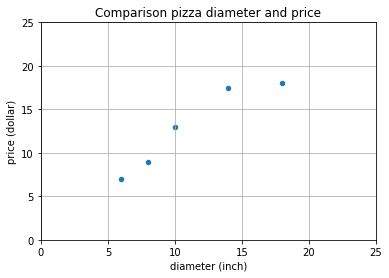

In [9]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x = 'diameter', y = 'price')

plt.title ('Comparison pizza diameter and price')
plt.xlabel('diameter (inch)')
plt.ylabel('price (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()





# Convert Dataset to an array

In [10]:
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['price'])

print(f"{X}")
print(f"{y}")

[ 6  8 10 14 18]
[ 7.   9.  13.  17.5 18. ]


In [11]:
X = X.reshape(-1,1)
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

# Linear regression Model

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
X_vis = np.array([0,25]).reshape(-1,1)
y_vis = model.predict(X_vis)

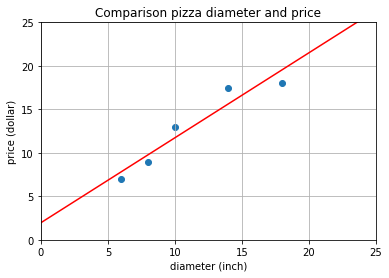

In [19]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title ('Comparison pizza diameter and price')
plt.xlabel('diameter (inch)')
plt.ylabel('price (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

In [21]:
## y = intercept + Slope * X
print(f"model intercept (alpha) = {model.intercept_}")
print(f"model slope (beta) = {model.coef_}")

model intercept (alpha) = 1.965517241379315
model slope (beta) = [0.9762931]


In [29]:
## Slope = Cov(x,y) / Var(x)
Var_X = np.var(X.flatten(), ddof=1)
print(f"variance(x) = {Var_X}")

Covariance = np.cov(X.flatten(),y)[0][1]
print(f"covariance(x y) = {Covariance}")

slope = Covariance / Var_X
slope

variance(x) = 23.2
covariance(x y) = 22.650000000000002


0.976293103448276

In [32]:
# Intercept
Intercept = np.mean(y)-slope*np.mean(X)
Intercept

1.9655172413793096

# Predict Pizza Price with the 'diameter' variable

In [35]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)

price_predict = model.predict(diameter_pizza)

for dmtr, price in zip(diameter_pizza, price_predict):
    print(f"diameter pizza {dmtr} price is {price}")


diameter pizza [12] price is 13.681034482758621
diameter pizza [20] price is 21.491379310344826
diameter pizza [23] price is 24.42025862068965


# Evaluation on Linear Regression using R-squared

In [36]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1,1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1,1)
y_test = np.array([11, 8.5, 15, 18, 11])

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f"R-squared = {r_squared}")

R-squared = 0.6620052929422553


In [ ]:
# R-squared = 1 - Sumsquared Residual/Sumsquared Total
# coefficient of determination